In [1]:
import numpy   as np
import pandas  as pd
from   kmodes  import kmodes

In [29]:
dict1 =  {'Gender': ['M','F','F','F','F','F','M','F','M','F','M','F','M','F','F'], \
          'Income_Level' : ['L','H','M','H','H','H','M','L','L','L','L','L','L','L','L'],\
          'Age' : [25, 44, 40, 37, 43, 29, 25, 28, 28, 32, 27,40,27,41,42]}
ind_va = [0]
df     = pd.DataFrame(dict1)

D:\Python\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


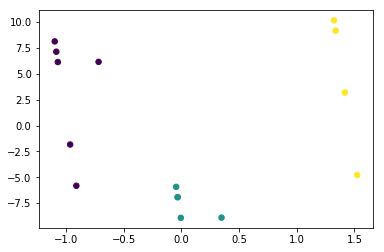

In [30]:
df_dummy = pd.get_dummies(df)

#transform into numpy array
x = df_dummy.reset_index().values

km = kmodes.KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(x)
df_dummy['clusters'] = clusters


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dummy.ix[:,0:12])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["clusters"], s=30)
plt.show()

In [31]:
# Print the cluster centroids
print(km.cluster_centroids_)

[[ 2 40  1  0  0  1  0]
 [ 0 25  0  1  0  1  0]
 [ 1 29  1  0  1  0  0]]


In [32]:
print(df_dummy.T)

                0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
Age             25  44  40  37  43  29  25  28  28  32  27  40  27  41  42
Gender_F         0   1   1   1   1   1   0   1   0   1   0   1   0   1   1
Gender_M         1   0   0   0   0   0   1   0   1   0   1   0   1   0   0
Income_Level_H   0   1   0   1   1   1   0   0   0   0   0   0   0   0   0
Income_Level_L   1   0   0   0   0   0   0   1   1   1   1   1   1   1   1
Income_Level_M   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0
clusters         1   2   0   2   2   2   1   0   1   0   1   0   1   0   0


In [33]:
print(df_dummy.loc[df_dummy['clusters'] == 2,:])

   Age  Gender_F  Gender_M  Income_Level_H  Income_Level_L  Income_Level_M  \
1   44         1         0               1               0               0   
3   37         1         0               1               0               0   
4   43         1         0               1               0               0   
5   29         1         0               1               0               0   

   clusters  
1         2  
3         2  
4         2  
5         2  


### From this we observe that persons in cluster 2 have income level High, female and age above 29

In [34]:
print(df_dummy.loc[df_dummy['clusters'] == 1,:])

    Age  Gender_F  Gender_M  Income_Level_H  Income_Level_L  Income_Level_M  \
0    25         0         1               0               1               0   
6    25         0         1               0               0               1   
8    28         0         1               0               1               0   
10   27         0         1               0               1               0   
12   27         0         1               0               1               0   

    clusters  
0          1  
6          1  
8          1  
10         1  
12         1  


### From this we observe that persons in cluster 1 have income level Low or Medium and male with age 25 or above

In [35]:
print(df_dummy.loc[df_dummy['clusters'] == 0,:])

    Age  Gender_F  Gender_M  Income_Level_H  Income_Level_L  Income_Level_M  \
2    40         1         0               0               0               1   
7    28         1         0               0               1               0   
9    32         1         0               0               1               0   
11   40         1         0               0               1               0   
13   41         1         0               0               1               0   
14   42         1         0               0               1               0   

    clusters  
2          0  
7          0  
9          0  
11         0  
13         0  
14         0  


### From this we observe that persons in cluster 0 have income level Low, female and age 28 or above